In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [2]:
dataset = pd.read_csv('k-NN.csv')
dataset

,x,y,class
0,2,4,negative
1,4,2,negative
2,4,4,positive
3,6,2,positive
4,4,6,negative
5,6,4,negative


In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
y

array(['negative', 'negative', 'positive', 'positive', 'negative',
       'negative'], dtype=object)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [7]:
classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
x_test = np.array([6,6])

In [9]:
print(x_test)

[6 6]


In [10]:
y_pred = classifier.predict([x_test])

In [11]:
print ('General-KNN: ', y_pred)

General-KNN:  ['negative']


In [12]:
classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [13]:
x_test = np.array([6, 6])
y_pred = classifier.predict([x_test])

In [14]:
print('Distance Weighted KNN: ', y_pred)

Distance Weighted KNN:  ['negative']


In [15]:
h = 0.2

In [16]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

0    1
1    1
2    0
3    0
4    1
5    1
Name: class, dtype: int64


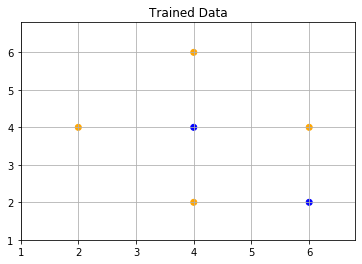

In [17]:
colors = ['blue', 'orange']
data_classes = ['positive', 'negative']
d = dict(zip(data_classes, range(0,2)))

numeric = dataset['class'].map(d, na_action='ignore')
print(numeric)
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=numeric, cmap=ListedColormap(colors))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Trained Data")
plt.grid()
plt.show()

In [18]:
y_pred = str(y_pred).strip('[]')
y_pred = y_pred.replace("'", "")
dataset = dataset.append(pd.Series([x_test[0], x_test[1] , y_pred], index=dataset.columns ), ignore_index=True)

In [19]:
print(dataset)

   x  y     class
0  2  4  negative
1  4  2  negative
2  4  4  positive
3  6  2  positive
4  4  6  negative
5  6  4  negative
6  6  6  negative


In [20]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(x, y)

[[2 4]
 [4 2]
 [4 4]
 [6 2]
 [4 6]
 [6 4]
 [6 6]] ['negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative']


In [22]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

0    1
1    1
2    0
3    0
4    1
5    1
6    1
Name: class, dtype: int64


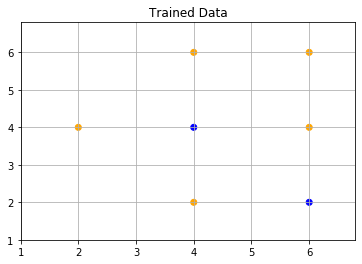

In [23]:
numeric = dataset['class'].map(d, na_action='ignore')
print(numeric)
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=numeric, cmap=ListedColormap(colors))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Trained Data")
plt.grid()
plt.show()

In [ ]:
#OPTIONAL: Adding the appended value to the csv file
#with open('k-NN.csv','a') as fd:
#    fd.write(y_pred)